In [ ]:
import pandas as pd
import numpy as np

INPUT_PATH="C:/toll-recreation/"
travel_time = pd.read_csv('./2018TTs.csv', error_bad_lines=True)
tolls = pd.read_csv('./2018tolls.csv', error_bad_lines=True)

In [ ]:
# convert datetimes from both dataframes into a datetime object to ensure same format
travel_time['datetime'] = pd.to_datetime(travel_time['datetime'])
tolls['datetime'] = pd.to_datetime(tolls['datetime'])

# merge on datetime and corridor
data = pd.merge(travel_time, tolls,on=['corridor', 'datetime'])

In [ ]:
data.shape

(66570, 15)

In [ ]:
data.dtypes

corridor                  object
datetime          datetime64[ns]
DOW                       object
TOD                       object
corridorTT               float64
numSegs                    int64
lenTraversed             float64
pctTraversed              object
completed                 object
Direction                 object
Origin ID                 object
Origin Name               object
Direction ID              object
Direction Name            object
Toll($)                  float64
dtype: object

In [ ]:
data.describe

<bound method NDFrame.describe of               corridor            datetime  ...       Direction Name Toll($)
0      I-495-NB-Exp-S1 2018-03-01 06:00:00  ...  I-66-tolled-Exit-NB    2.85
1      I-495-NB-Exp-S1 2018-03-01 06:01:00  ...  I-66-tolled-Exit-NB    2.85
2      I-495-NB-Exp-S1 2018-03-01 06:02:00  ...  I-66-tolled-Exit-NB    2.85
3      I-495-NB-Exp-S1 2018-03-01 06:03:00  ...  I-66-tolled-Exit-NB    2.85
4      I-495-NB-Exp-S1 2018-03-01 06:04:00  ...  I-66-tolled-Exit-NB    2.85
...                ...                 ...  ...                  ...     ...
66565     I-495-SB-Exp 2018-05-31 18:55:00  ...        tolled-end-SB   23.45
66566     I-495-SB-Exp 2018-05-31 18:56:00  ...        tolled-end-SB   23.45
66567     I-495-SB-Exp 2018-05-31 18:57:00  ...        tolled-end-SB   23.45
66568     I-495-SB-Exp 2018-05-31 18:58:00  ...        tolled-end-SB   23.45
66569     I-495-SB-Exp 2018-05-31 18:59:00  ...        tolled-end-SB   23.45

[66570 rows x 15 columns]>

In [ ]:
data['Direction'].value_counts()

SB    41550
NB    25020
Name: Direction, dtype: int64

In [ ]:
data['Direction Name'].value_counts()

I-66-tolled-Exit-SB      15610
Braddock-tolled-SB       15610
North-Tyson-tolled-NB    12510
I-66-tolled-Exit-NB      12510
tolled-end-SB            10330
Name: Direction Name, dtype: int64

In [ ]:
data['Origin Name'].value_counts()

I-66-Entrance-tolled-SB    15610
North-Tyson-tolled-SB      15610
I-66-Entrance-tolled-NB    12510
Braddock-tolled-NB         12510
tolled-start-SB            10330
Name: Origin Name, dtype: int64

In [ ]:
# drop columns that aren't necessary
data = data.drop(['completed', 'Origin ID', 'Direction ID', 'pctTraversed', 'DOW', 'TOD'], axis=1)

In [ ]:
import datetime as dt

#make sure pandas knows it's a date field 
data['datetime'] = pd.to_datetime(data['datetime'])

# separate columns for time, DOW, hour, month, weekend
data['time'] = data['datetime'].dt.hour + data['datetime'].dt.minute / 60.
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.dayofweek
data['month'] = data['datetime'].dt.month - 1

# this will regularize the cycled time values by making 
# it in the shape of a circle - program knows that 0
# is close to 23
data['time_x'] = np.sin(data['time']*(2.*np.pi/24))
data['time_y'] = np.cos(data['time']*(2.*np.pi/24))
data['hour_x'] = np.sin(data['hour']*(2.*np.pi/24))
data['hour_y'] = np.cos(data['hour']*(2.*np.pi/24))
data['day_x'] = np.sin(data['day']*(2.*np.pi/7))
data['day_y'] = np.cos(data['day']*(2.*np.pi/7))
data['month_x'] = np.sin(data['month']*(2.*np.pi/12))
data['month_y'] = np.cos(data['month']*(2.*np.pi/12))

In [ ]:
# drop the old time columns
data = data.drop(['datetime', 'time', 'hour', 'day', 'month'], axis=1)

In [ ]:
data.head()

,corridor,corridorTT,numSegs,lenTraversed,Direction,Origin Name,Direction Name,Toll($),time_x,time_y,hour_x,hour_y,day_x,day_y,month_x,month_y
0,I-495-NB-Exp-S1,5.56,12,6.129403,NB,Braddock-tolled-NB,I-66-tolled-Exit-NB,2.85,1.000000,6.123234e-17,1.0,6.123234e-17,0.433884,-0.900969,0.866025,0.5
1,I-495-NB-Exp-S1,5.61,12,6.129403,NB,Braddock-tolled-NB,I-66-tolled-Exit-NB,2.85,0.999990,-4.363309e-03,1.0,6.123234e-17,0.433884,-0.900969,0.866025,0.5
2,I-495-NB-Exp-S1,5.63,12,6.129403,NB,Braddock-tolled-NB,I-66-tolled-Exit-NB,2.85,0.999962,-8.726535e-03,1.0,6.123234e-17,0.433884,-0.900969,0.866025,0.5
3,I-495-NB-Exp-S1,5.63,12,6.129403,NB,Braddock-tolled-NB,I-66-tolled-Exit-NB,2.85,0.999914,-1.308960e-02,1.0,6.123234e-17,0.433884,-0.900969,0.866025,0.5
4,I-495-NB-Exp-S1,5.64,12,6.129403,NB,Braddock-tolled-NB,I-66-tolled-Exit-NB,2.85,0.999848,-1.745241e-02,1.0,6.123234e-17,0.433884,-0.900969,0.866025,0.5


In [ ]:
# view the correlation matrix
data.corr()

,corridorTT,numSegs,lenTraversed,Toll($),time_x,time_y,hour_x,hour_y,day_x,day_y,month_x,month_y
corridorTT,1.000000,0.582481,0.606897,0.470330,-0.096749,-0.012202,-0.093601,-0.041722,0.071234,-0.010717,0.013802,-0.213952
numSegs,0.582481,1.000000,0.992580,0.589370,-0.072433,0.032135,-0.072973,0.009545,0.011652,0.008728,0.040094,-0.146208
lenTraversed,0.606897,0.992580,1.000000,0.627766,-0.083360,0.036988,-0.083981,0.010992,0.011766,0.008762,0.041573,-0.147536
Toll($),0.470330,0.589370,0.627766,1.000000,-0.515680,0.259511,-0.520275,0.088004,0.101912,-0.023003,0.066583,-0.191008
time_x,-0.096749,-0.072433,-0.083360,-0.515680,1.000000,-0.318195,0.998404,0.006681,-0.000145,0.007133,-0.075618,-0.002647
time_y,-0.012202,0.032135,0.036988,0.259511,-0.318195,1.000000,-0.353734,0.916449,-0.001326,-0.000256,0.019559,0.021243
hour_x,-0.093601,-0.072973,-0.083981,-0.520275,0.998404,-0.353734,1.000000,-0.033386,0.000019,0.007022,-0.075518,-0.005011
hour_y,-0.041722,0.009545,0.010992,0.088004,0.006681,0.916449,-0.033386,1.000000,-0.001010,0.002381,-0.006434,0.017874
day_x,0.071234,0.011652,0.011766,0.101912,-0.000145,-0.001326,0.000019,-0.001010,1.000000,0.217926,-0.042980,-0.081853
day_y,-0.010717,0.008728,0.008762,-0.023003,0.007133,-0.000256,0.007022,0.002381,0.217926,1.000000,0.073895,0.011080


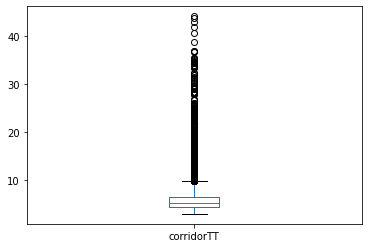

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

# plot the travel times
data.plot(kind="box", y="corridorTT")

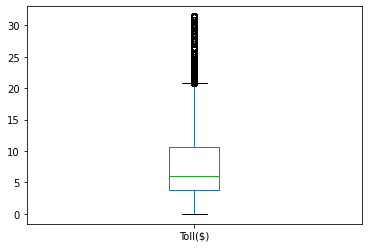

In [ ]:
# plot the tolls
data.plot(kind="box", y="Toll($)")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


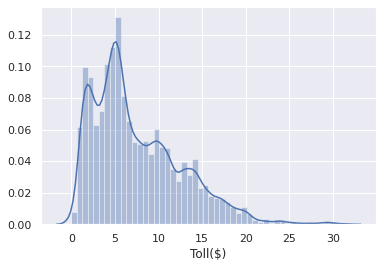

In [ ]:
import seaborn as sns
sns.set()

# toll price distribution
sns.distplot(data['Toll($)'])

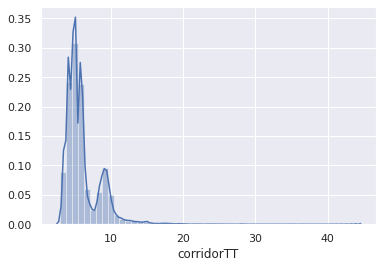

In [ ]:
# travel time distribution
sns.distplot(data['corridorTT'])

In [ ]:
# encode the categorical variables within the origin/direction columns
data = pd.get_dummies(data, columns=['corridor', 'Origin Name', 'Direction Name', 'Direction'])

In [ ]:
from sklearn.model_selection import train_test_split

# separate the label(X) and target(y) sets and store as numpy array
X = data.drop(['corridorTT', 'Toll($)'], axis=1).values
y = data[['corridorTT', 'Toll($)']].values

# separate X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# being training the data. First im going to fit a multi-target regression using random forrests
max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
# fit train data to the multi-target model
regr_multirf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=30,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                

In [ ]:
# Predict on new data
y_multirf = regr_multirf.predict(X_test)

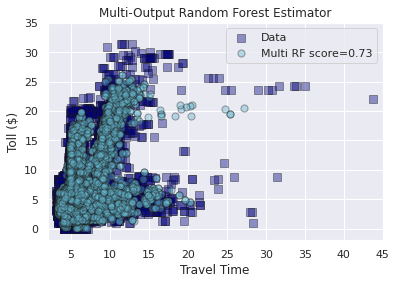

In [ ]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
            c="c", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.xlim([2, 45])
plt.ylim([-2, 35])
plt.xlabel("Travel Time")
plt.ylabel("Toll ($)")
plt.title("Multi-Output Random Forest Estimator")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# report the root mean squared error on the test data
rmf_predictions = regr_multirf.predict(X_test)
forest_mse = mean_squared_error(y_test, rmf_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.8648966258997532

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# hyperparameter tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# cannot hyperparameter tune with a multi target output (dont know why) so I'm going to separate the outputs and tune each separately
# Separate the training and test data into arrays of a single target value
y_train_0 = y_train[:,0]
y_train_1 = y_train[:,1]

In [ ]:
# fit the random search model on the first target
rf_random.fit(X_train, y_train_0)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 11.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# view the best params for the first target value
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
# fit the random search model on the second target
rf_random.fit(X_train, y_train_1)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 12.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# view the best params for the second target value
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
# although I only did 5 iterations - the best parameters still were the same for both targets
# i'll use these parameters in the multioutput model and see if it improves

regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=200,
                                                          max_depth=50,
                                                          bootstrap=True,
                                                          max_features='sqrt',
                                                          min_samples_leaf=2,
                                                          min_samples_split=10,
                                                          random_state=42))

In [ ]:
# fit train data to the multi-target model
regr_multirf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=50,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=10,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=200,
                                               

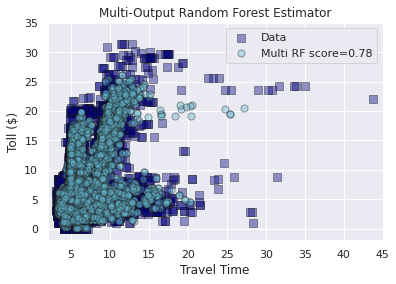

In [ ]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
            c="c", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.xlim([2, 45])
plt.ylim([-2, 35])
plt.xlabel("Travel Time")
plt.ylabel("Toll ($)")
plt.title("Multi-Output Random Forest Estimator")
plt.legend()
plt.show()

The score improved by 5%

In [ ]:
# keys of the train set
keys = data.drop(['corridorTT', 'Toll($)'], axis=1).keys()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# lets see if a neural network performs better. This is a sequential model with 2 hidden layers
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(keys)]),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation = None)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
# build the model and show the summary
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 20,354
Trainable params: 20,354
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# number of iterations
EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:2.4352,  mae:0.9082,  mse:2.4361,  val_loss:2.4954,  val_mae:0.9801,  val_mse:2.4948,  
................

In [ ]:
# view the model performance metrics history in a tabulated format
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
11,2.441833,0.906725,2.435774,2.650615,1.016670,2.650089,11
12,2.433238,0.907180,2.433801,2.445772,0.919274,2.445161,12
13,2.435011,0.907644,2.435062,2.402044,0.889424,2.401464,13
14,2.437915,0.906916,2.438643,2.479797,0.909505,2.479375,14
15,2.428038,0.906576,2.428756,2.450517,0.900333,2.449776,15


In [ ]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

417/417 - 0s - loss: 2.3999 - mae: 0.9005 - mse: 2.4043
Testing set Mean Abs Error:  0.90


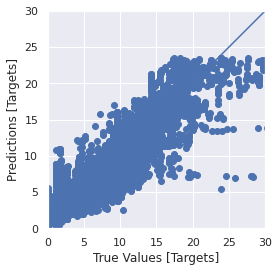

In [ ]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Targets]')
plt.ylabel('Predictions [Targets]')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

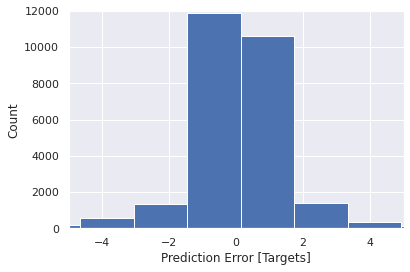

In [ ]:
error = test_predictions - y_test.flatten()
plt.hist(error, bins = 25)
lims = [-5, 5]
plt.xlim(lims)
plt.ylim(0, 12000)
plt.xlabel("Prediction Error [Targets]")
_ = plt.ylabel("Count")

In [ ]:
# make sure the predictions are outputting as expected
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 3.9709187,  5.204402 ],
       [11.1701145, 19.558971 ],
       [ 6.5380425,  2.5954716],
       [ 9.413631 , 16.990744 ],
       [ 7.226344 ,  7.688364 ],
       [ 4.139692 ,  3.210591 ],
       [ 5.5248466,  8.470179 ],
       [ 4.179892 ,  5.8528457],
       [ 5.2066436, 11.323377 ],
       [ 4.7092543,  3.3470716]], dtype=float32)

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
forest_mse = mean_squared_error(y_test,  test_predictions)

In [ ]:
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.5505739880530012

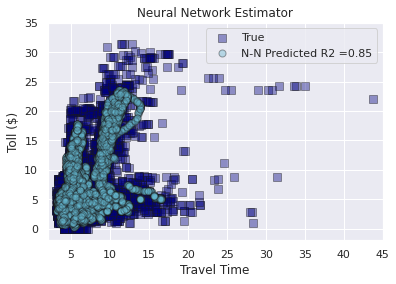

In [ ]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="True")
plt.scatter(test_predictions[:, 0], test_predictions[:, 1], edgecolor='k',
            c="c", s=s, alpha=a,
            label="N-N Predicted R2 =%.2f" % r2_score(y_test, test_predictions, multioutput='variance_weighted'))
plt.xlim([2, 45])
plt.ylim([-2, 35])
plt.xlabel("Travel Time")
plt.ylabel("Toll ($)")
plt.title("Neural Network Estimator")
plt.legend()
plt.show()

The Neural Network predicts the travel time and toll price with an accuracy of 85%

In [ ]:
# build the model and show the summary
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               3584      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 20,354
Trainable params: 20,354
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# number of iterations
EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:5.1414,  mae:1.3809,  mse:5.1423,  val_loss:4.1546,  val_mae:1.2230,  val_mse:4.1536,  
....................................................................

In [ ]:
# view the model performance metrics history in a tabulated format
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
63,2.354951,0.876349,2.355572,2.318551,0.869359,2.318164,63
64,2.352114,0.881428,2.353054,2.381974,0.858231,2.381507,64
65,2.351856,0.880103,2.352180,2.396090,0.886955,2.395689,65
66,2.347117,0.878529,2.347862,2.370926,0.874776,2.370528,66
67,2.345565,0.876037,2.344476,2.382533,0.897039,2.381963,67


In [ ]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

417/417 - 0s - loss: 2.3920 - mae: 0.9024 - mse: 2.3960
Testing set Mean Abs Error:  0.90


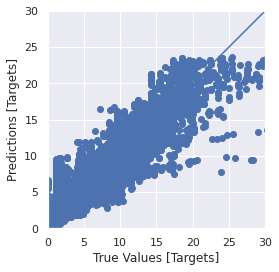

In [ ]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Targets]')
plt.ylabel('Predictions [Targets]')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

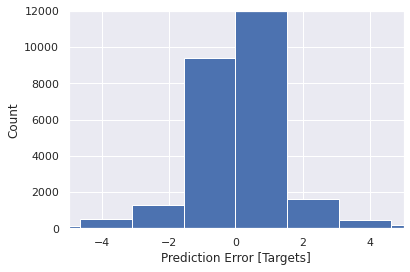

In [ ]:
error = test_predictions - y_test.flatten()
plt.hist(error, bins = 25)
lims = [-5, 5]
plt.xlim(lims)
plt.ylim(0, 12000)
plt.xlabel("Prediction Error [Targets]")
_ = plt.ylabel("Count")

In [ ]:
test_predictions = model.predict(X_test)
forest_mse = mean_squared_error(y_test,  test_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.5478989759503143

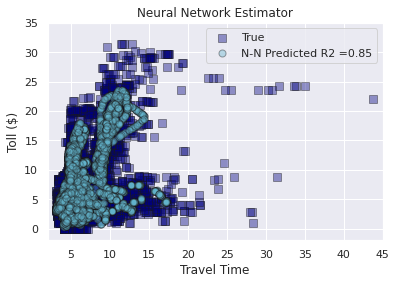

In [ ]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="True")
plt.scatter(test_predictions[:, 0], test_predictions[:, 1], edgecolor='k',
            c="c", s=s, alpha=a,
            label="N-N Predicted R2 =%.2f" % r2_score(y_test, test_predictions, multioutput='variance_weighted'))
plt.xlim([2, 45])
plt.ylim([-2, 35])
plt.xlabel("Travel Time")
plt.ylabel("Toll ($)")
plt.title("Neural Network Estimator")
plt.legend()
plt.show()